# 230968126 Week 7 Exercise 1

Name :- Kewal Thacker, Section A, Batch 1

EXERCISE 1: Time Series Analysis


Use the “employment.csv” data set and perform time series analysis and visualization through the 
following questions. 
1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of 
your DataFrame. Check if there are missing values in each column.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("D:\\230968126_Kewal\\Week7\\employment.csv")
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [3]:
df["datestamp"] = pd.to_datetime(df["datestamp"])
df.set_index("datestamp", inplace = True)
missing_values = df.isnull().sum()
print("No. of missing values in the columns of the dataframe are: ")
print(missing_values)

No. of missing values in the columns of the dataframe are: 
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


2. Generate a boxplot to find the distribution of unemployment rate for every industry .

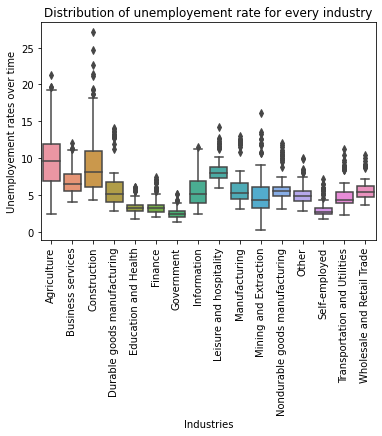

In [17]:
sns.boxplot(data = df)
plt.xlabel("Industries")
plt.ylabel("Unemployement rates over time")
plt.title("Distribution of unemployement rate for every industry")
plt.xticks(rotation = 90)
plt.show()

3. Using line chart Visualize the unemployment rate of workers by industry .

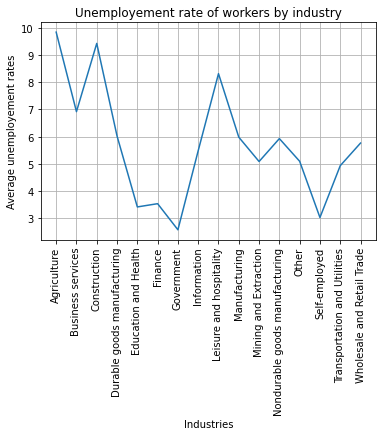

In [18]:
average_unemployement_rates = df.mean()
plt.plot(df.columns,average_unemployement_rates)
plt.xlabel("Industries")
plt.ylabel("Average unemployement rates")
plt.title("Unemployement rate of workers by industry")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

4. Plot the monthly and yearly trends .

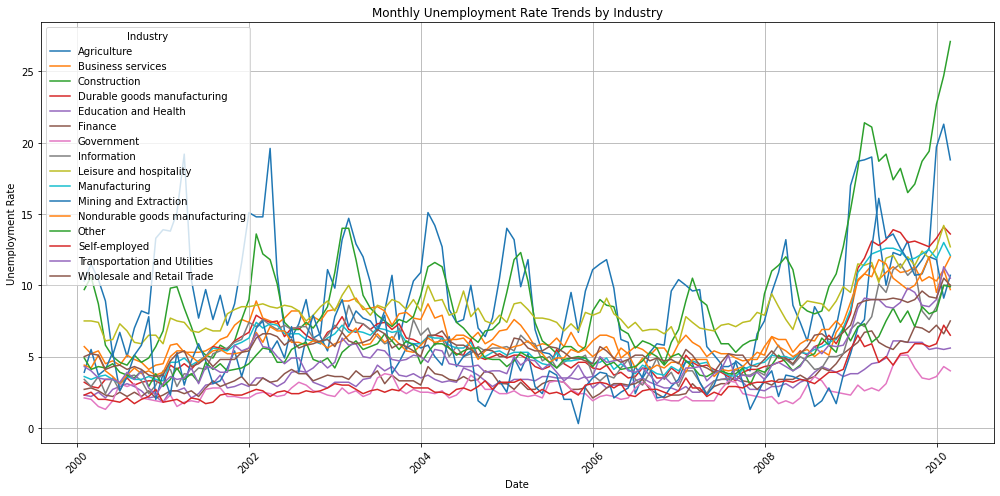

In [7]:
monthly_trends = df.resample('M').mean()
yearly_trends = df.resample('Y').mean()
plt.figure(figsize=(14, 7))
for column in monthly_trends.columns:
    plt.plot(monthly_trends.index, monthly_trends[column], label=column)
plt.title('Monthly Unemployment Rate Trends by Industry')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(title='Industry')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

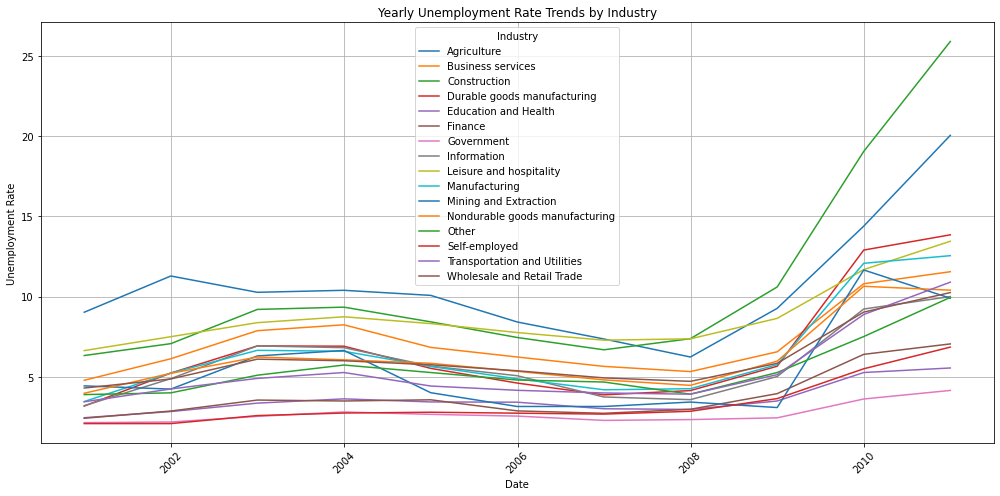

In [8]:
plt.figure(figsize=(14, 7))
for column in yearly_trends.columns:
    plt.plot(yearly_trends.index, yearly_trends[column], label=column)
plt.title('Yearly Unemployment Rate Trends by Industry')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(title='Industry')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Apply time series decomposition to your dataset to visualize the trend and seasonality 

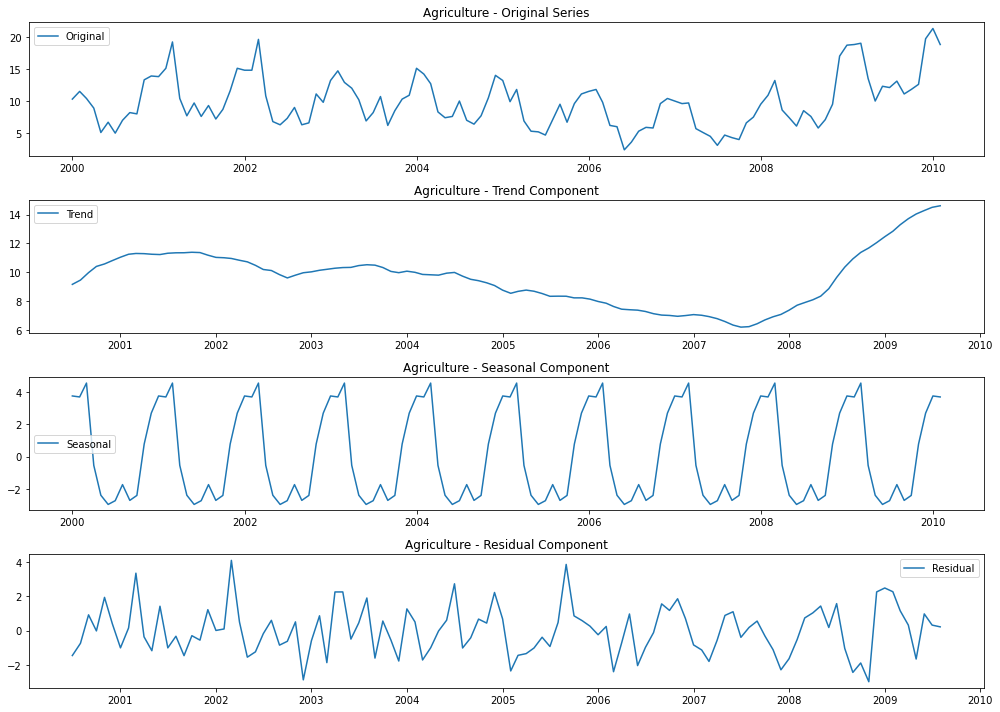

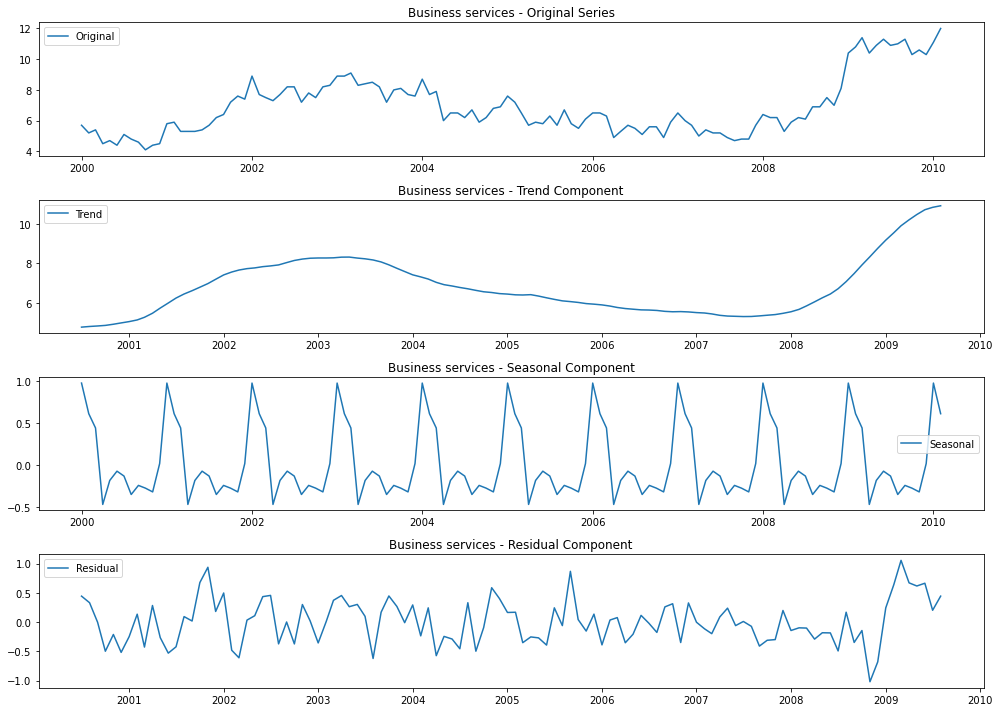

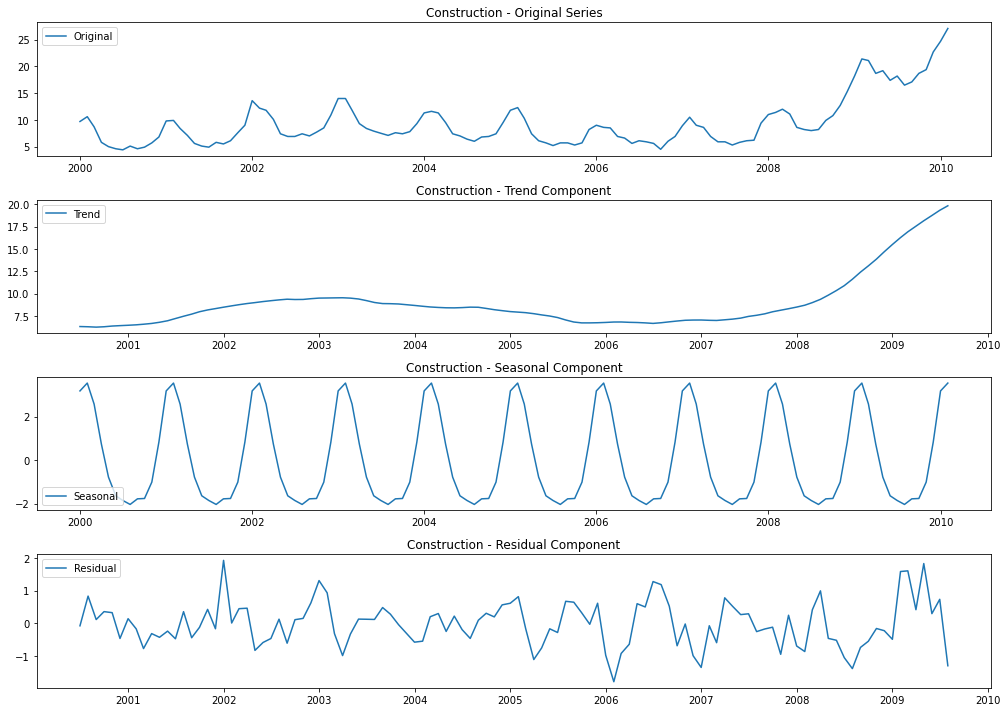

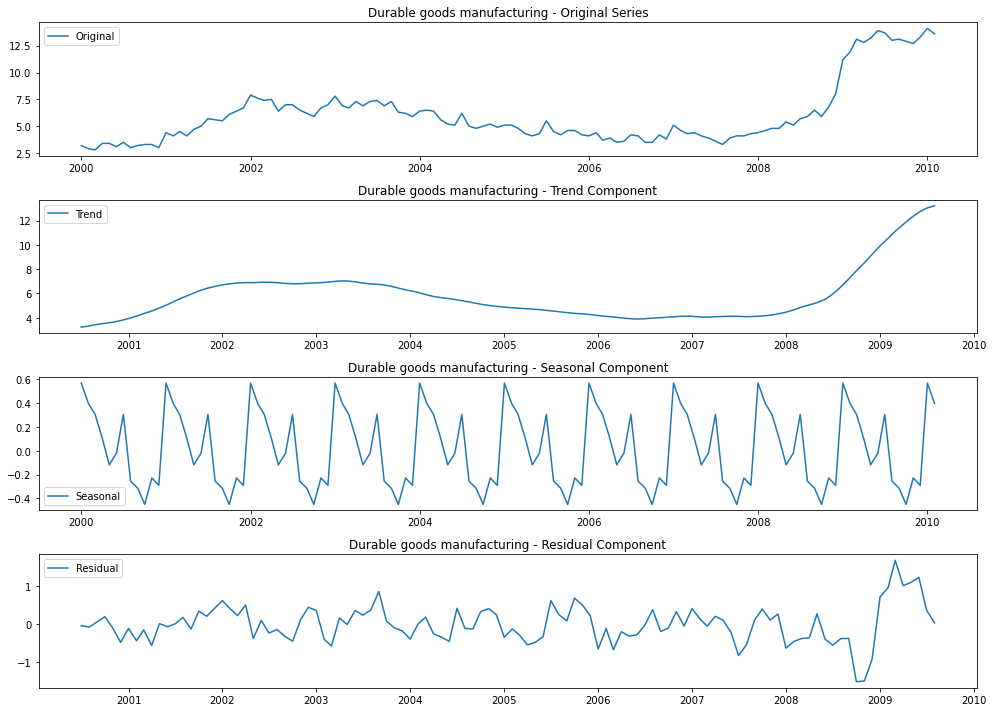

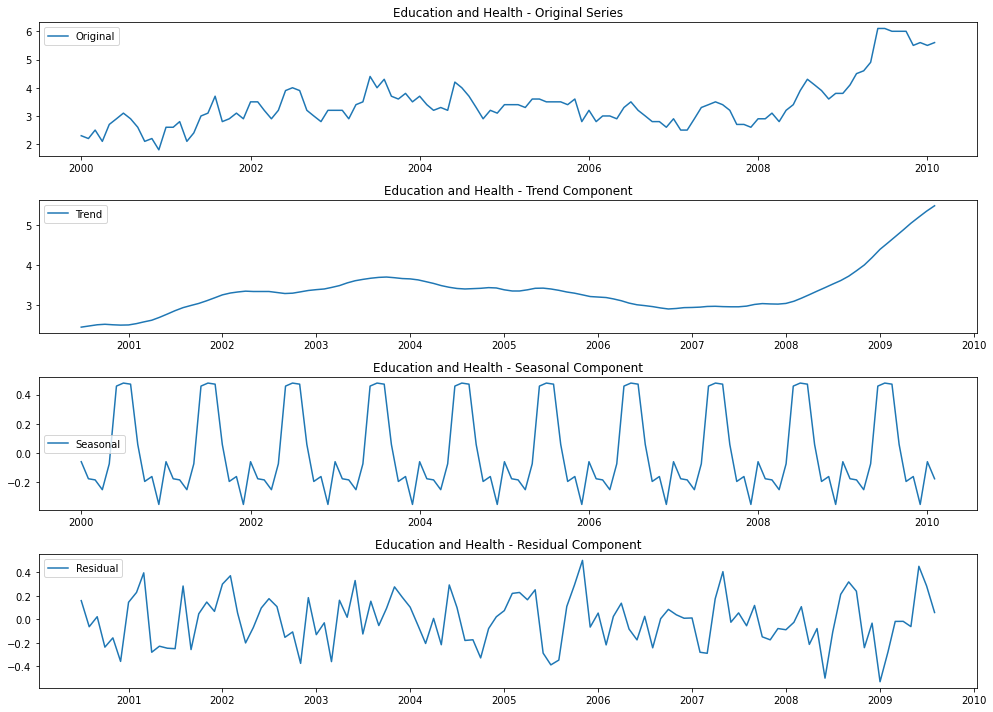

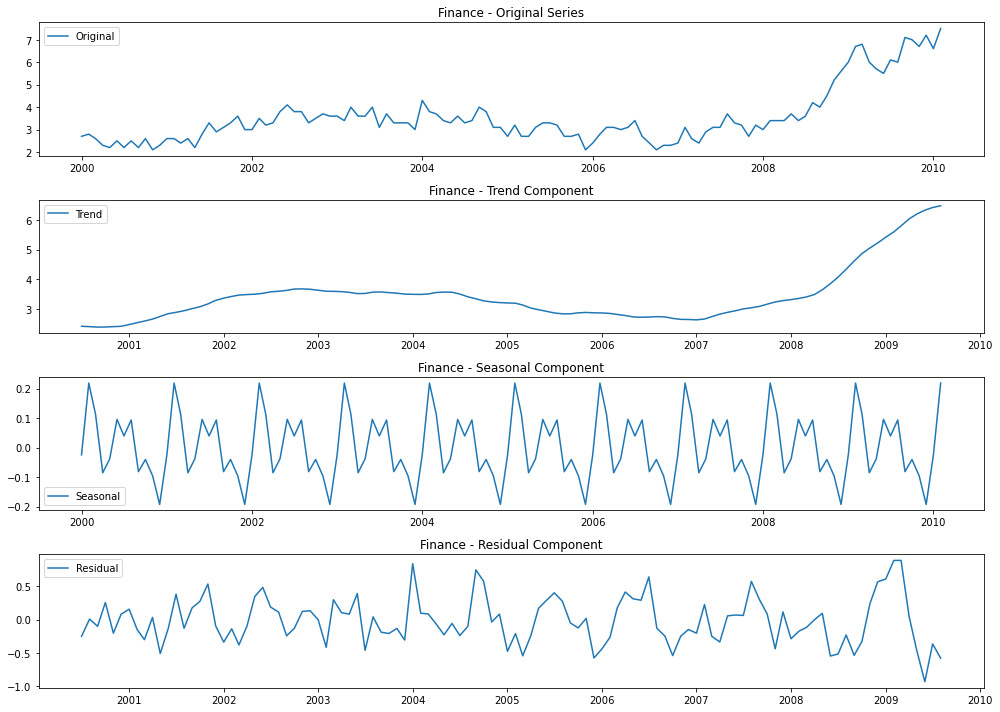

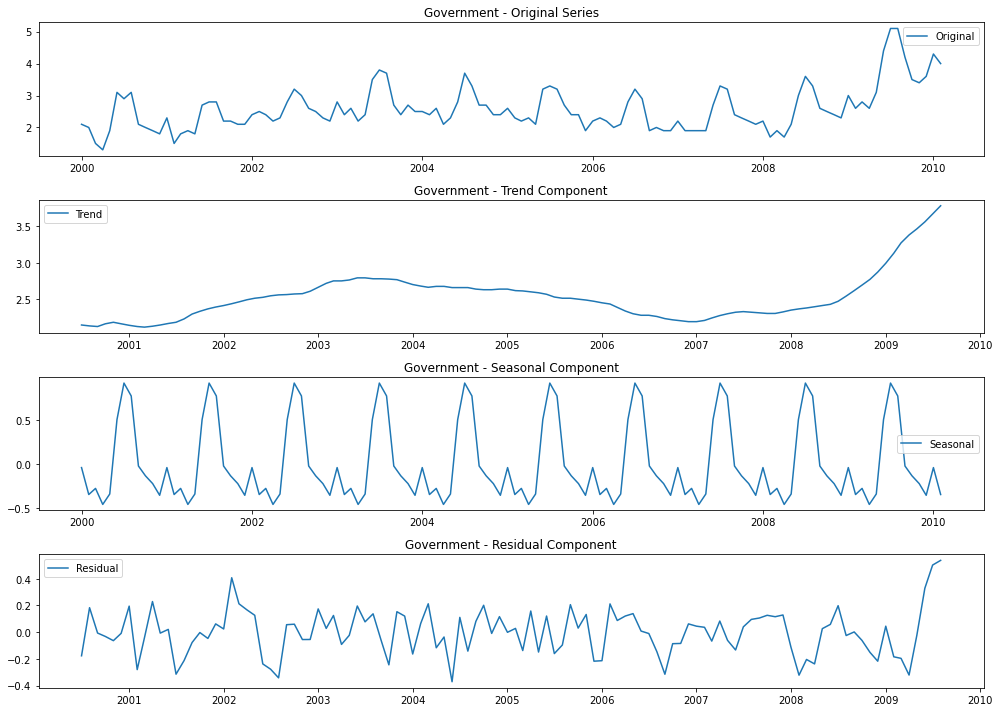

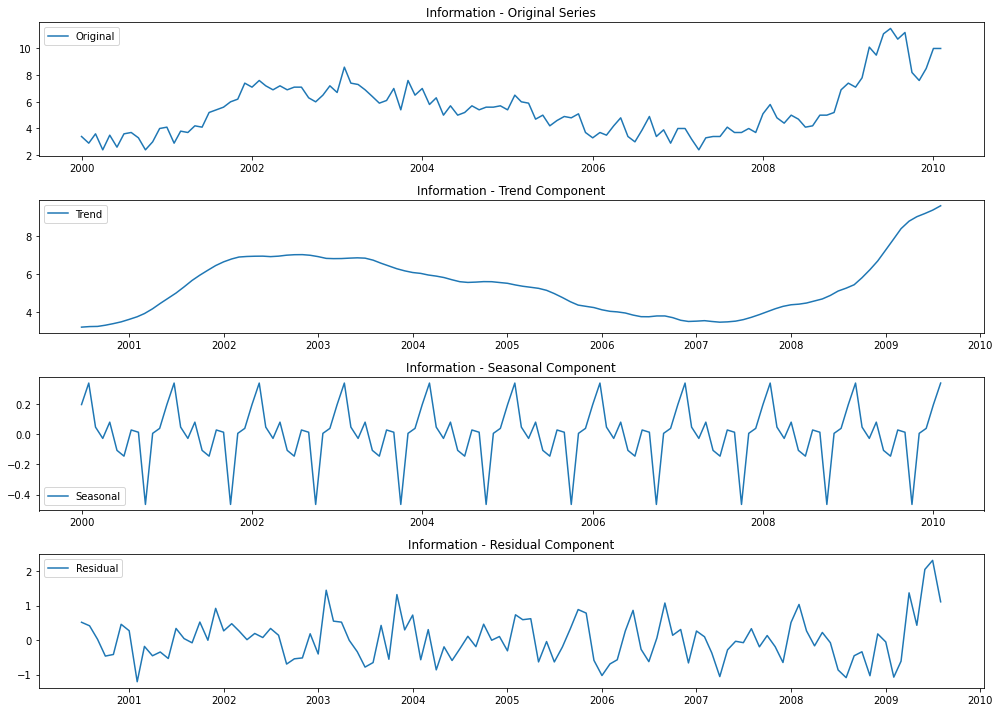

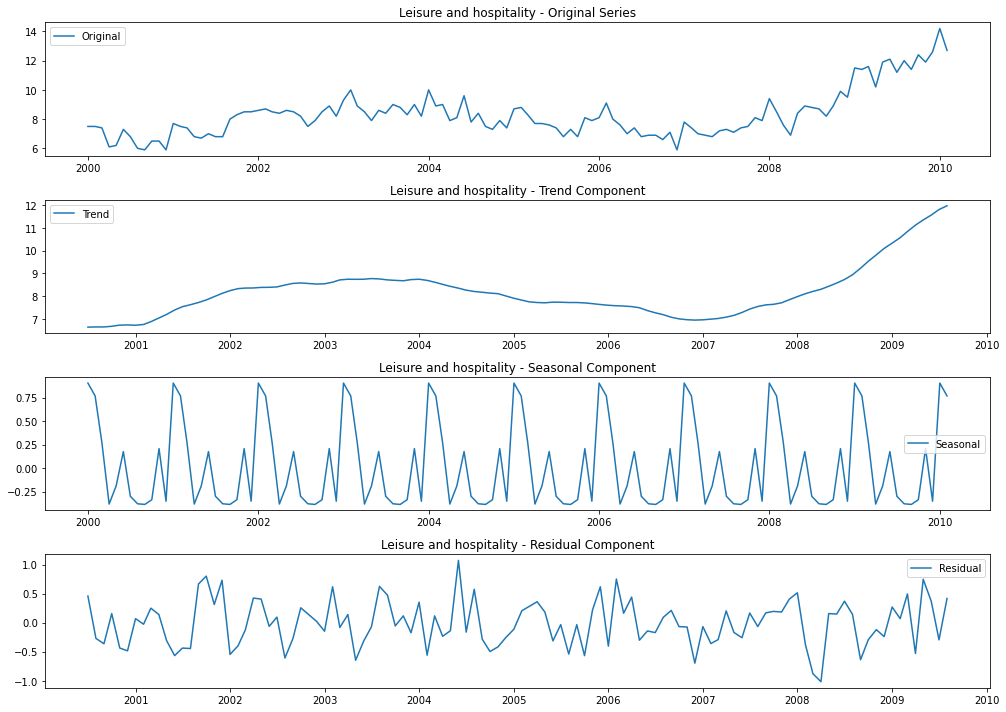

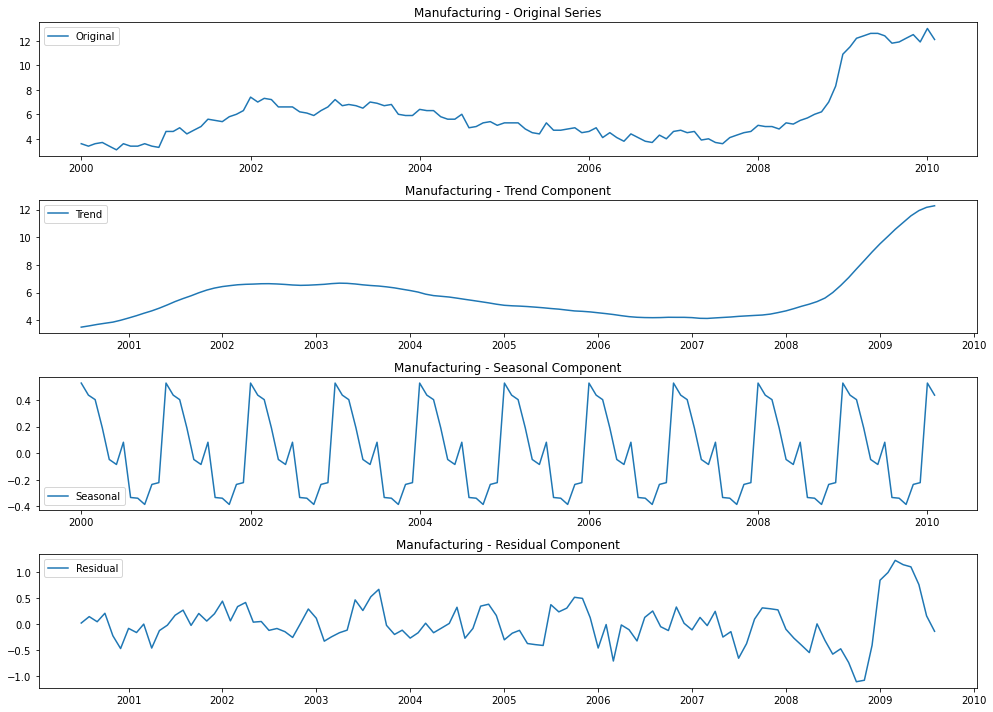

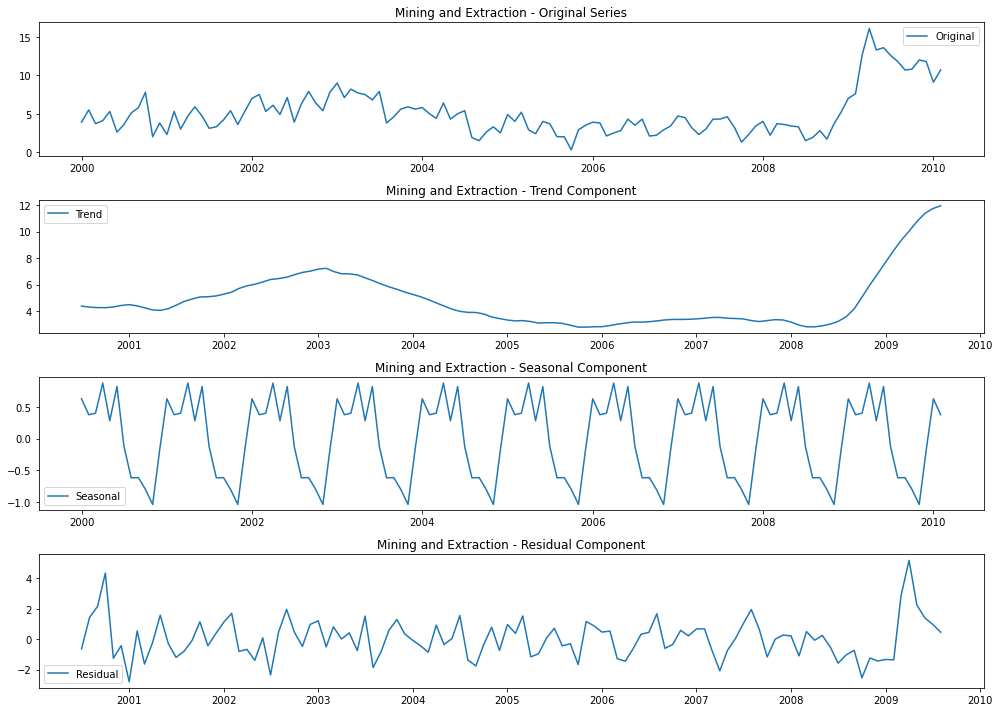

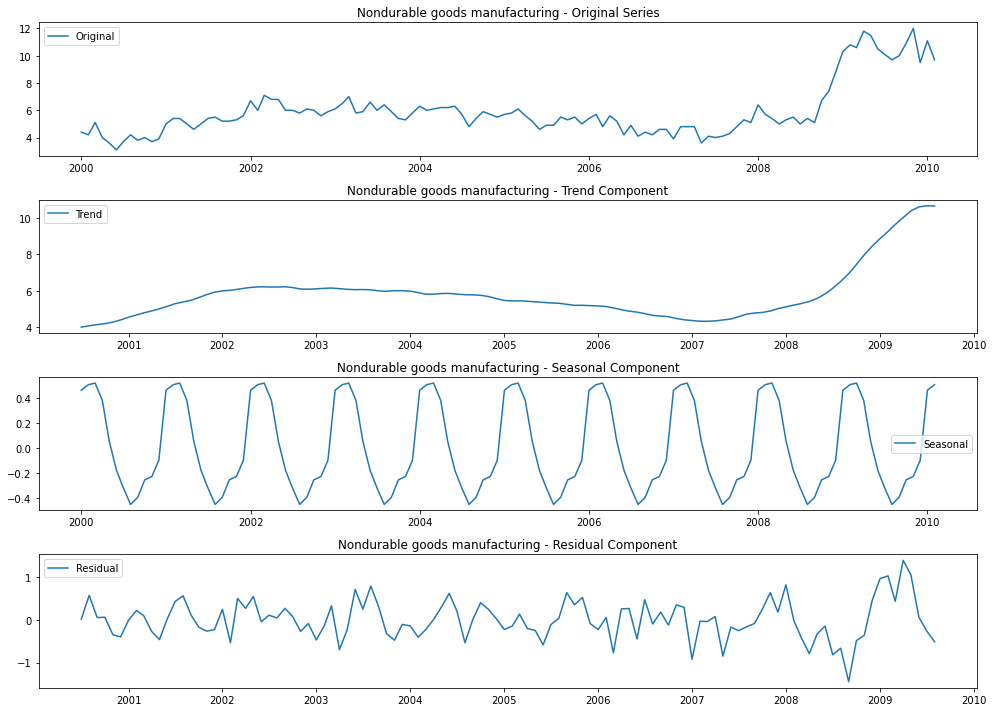

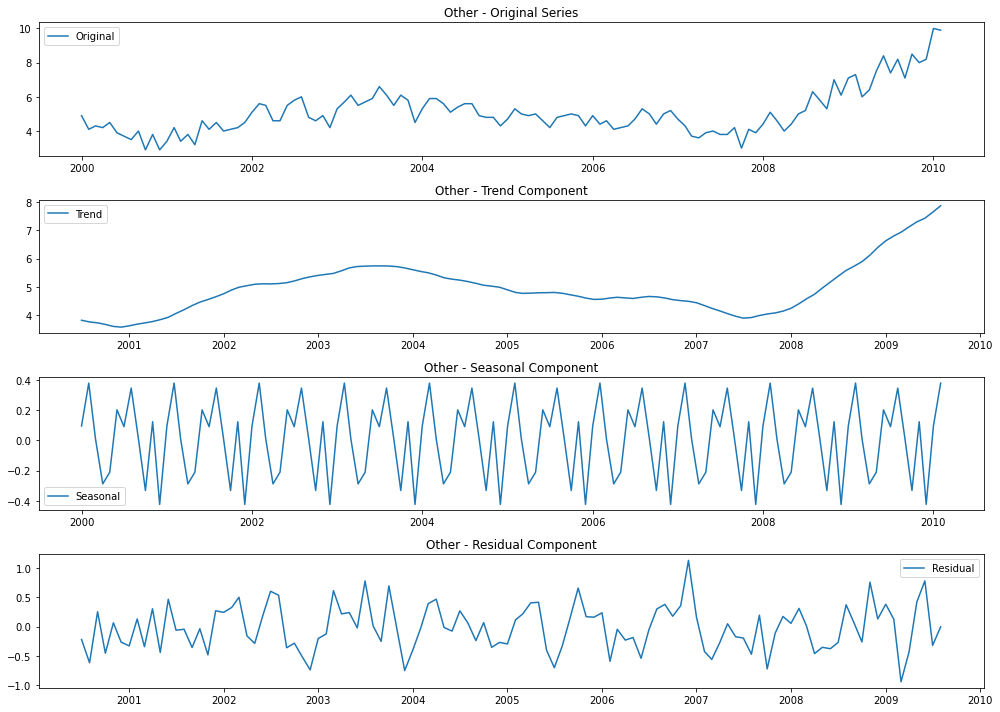

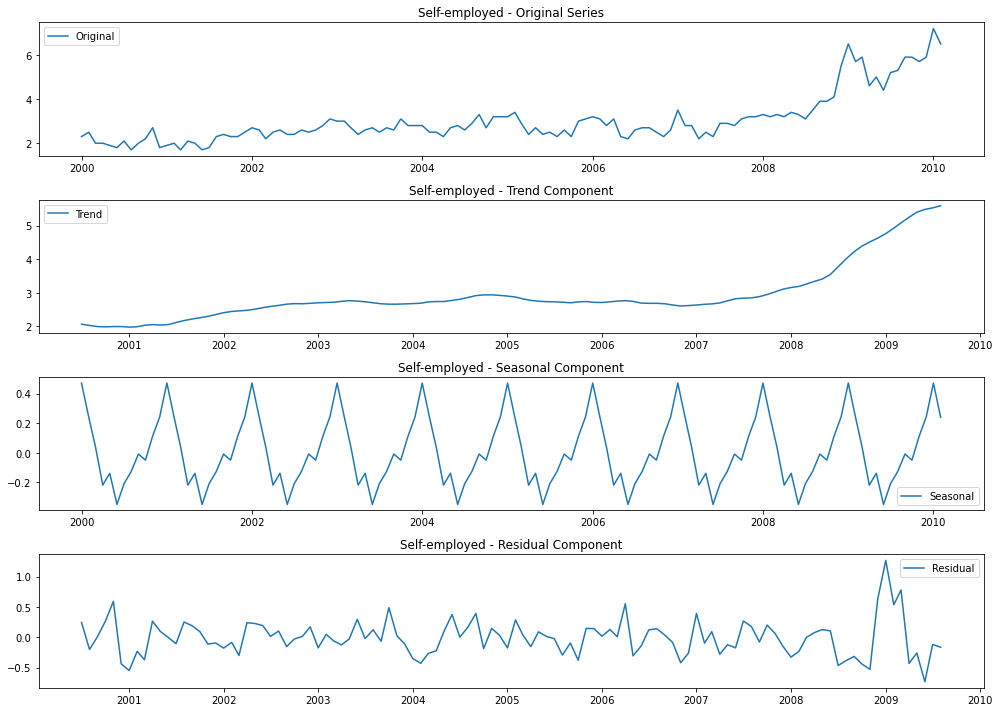

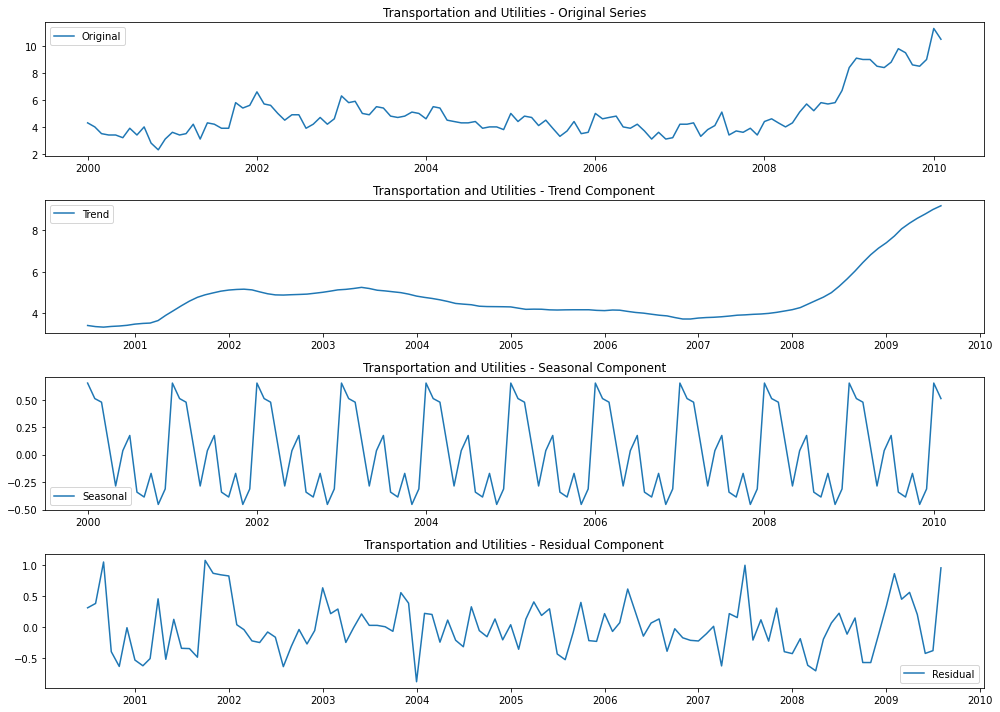

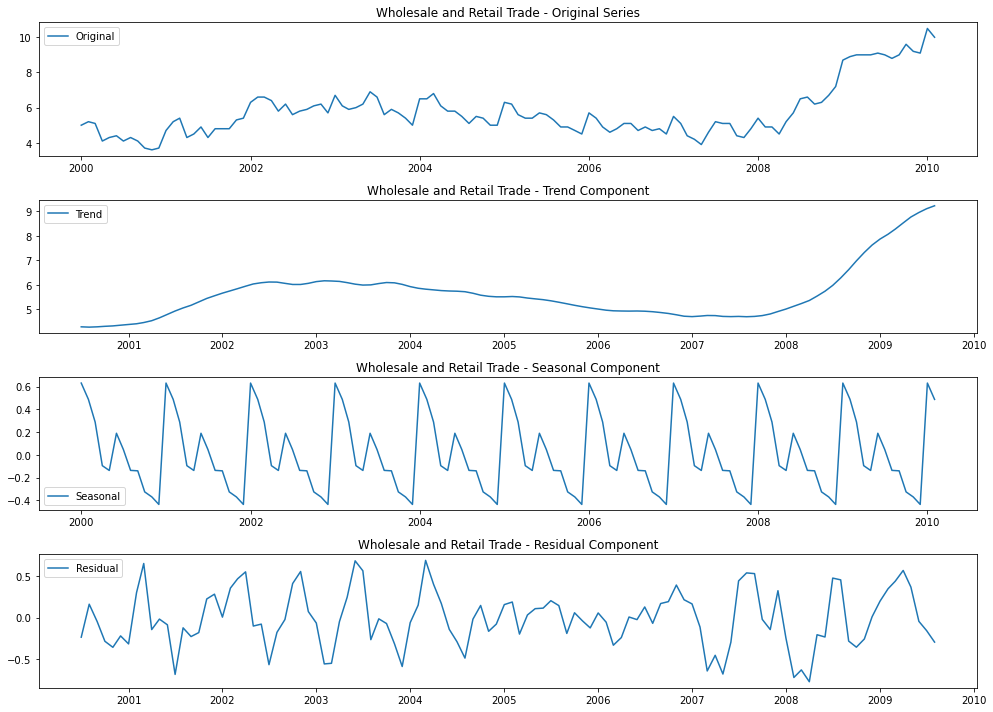

In [14]:
for industry in df.columns:  
    ts = df[industry].dropna()
    decomposition = seasonal_decompose(ts, model='additive')
    plt.figure(figsize=(14, 10))
    plt.subplot(4, 1, 1)
    plt.plot(ts, label='Original')
    plt.title(f'{industry} - Original Series')
    plt.legend(loc='best')
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.title(f'{industry} - Trend Component')
    plt.legend(loc='best')
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.title(f'{industry} - Seasonal Component')
    plt.legend(loc='best')
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residual')
    plt.title(f'{industry} - Residual Component')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

6. Visualize the seasonality of Agriculture and Finance sector.

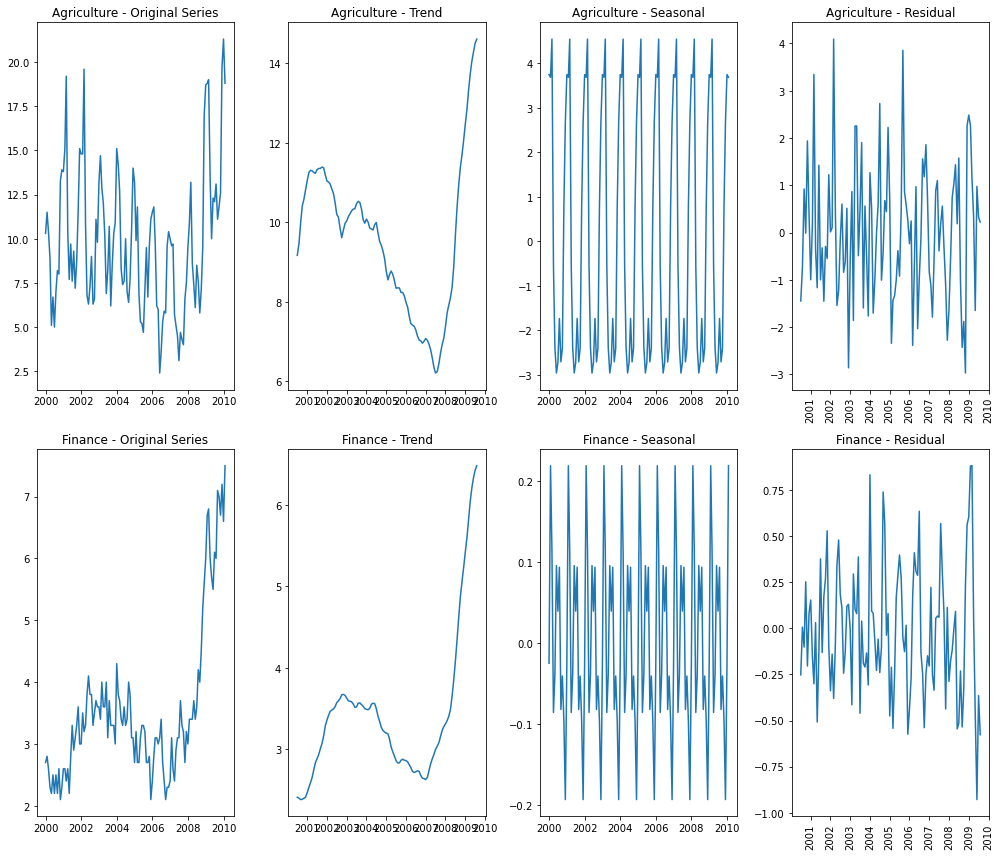

In [20]:
industries_to_decompose = ['Agriculture','Finance']  
plt.figure(figsize=(14, 12))
for i, industry in enumerate(industries_to_decompose, 1):
    ts = df[industry].dropna()
    decomposition = seasonal_decompose(ts, model='additive')
    plt.subplot(len(industries_to_decompose), 4, (i-1)*4+1)
    plt.plot(ts, label='Original')
    plt.title(f'{industry} - Original Series')
    plt.subplot(len(industries_to_decompose), 4, (i-1)*4+2)
    plt.plot(decomposition.trend, label='Trend')
    plt.title(f'{industry} - Trend')
    plt.subplot(len(industries_to_decompose), 4, (i-1)*4+3)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.title(f'{industry} - Seasonal')
    plt.subplot(len(industries_to_decompose), 4, (i-1)*4+4)
    plt.plot(decomposition.resid, label='Residual')
    plt.title(f'{industry} - Residual')
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

7. Visualize the seasonality of multiple time series and the correlation between each time series 
in the dataset.

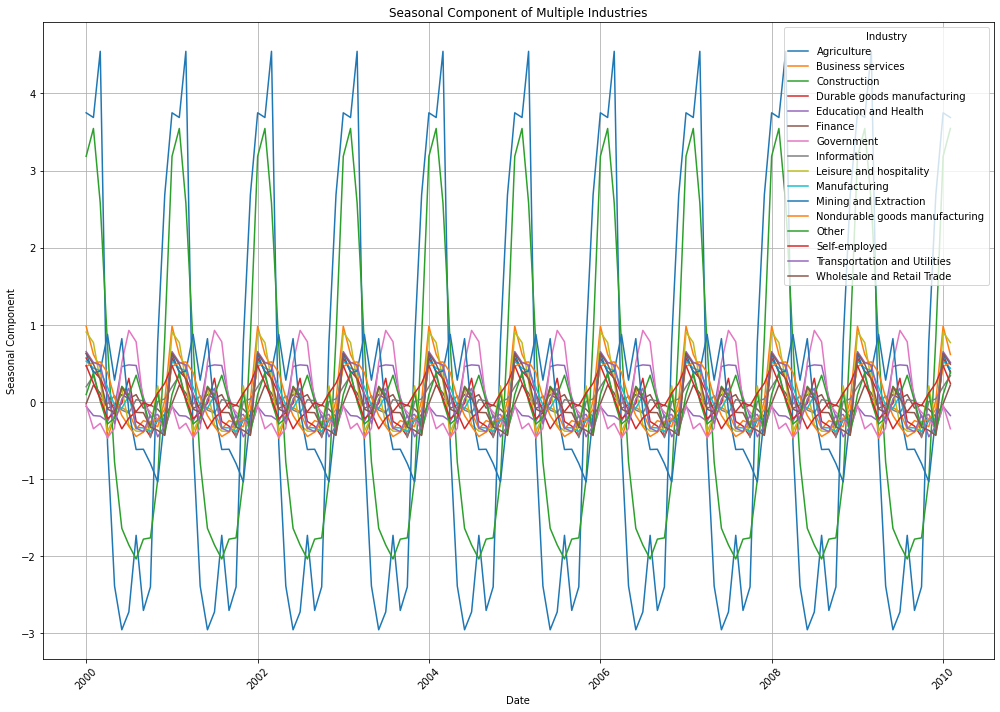

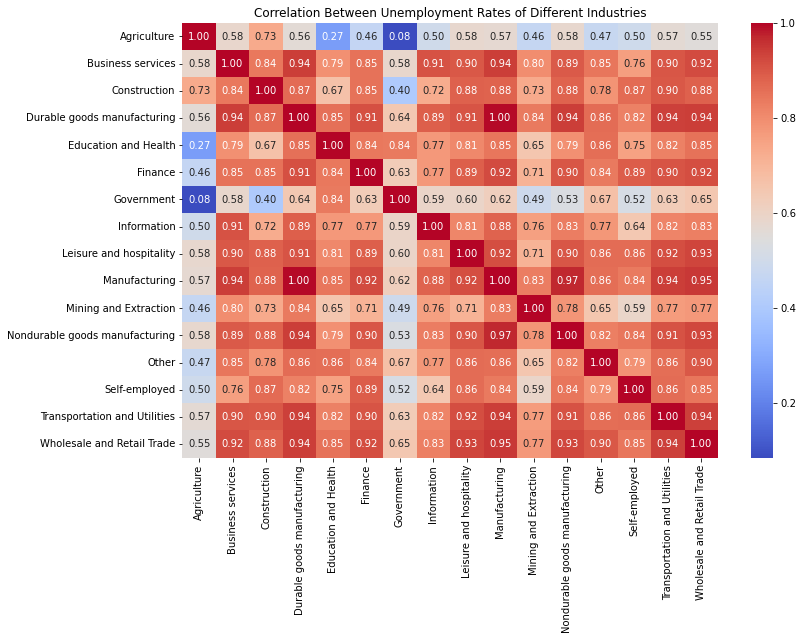

In [16]:
plt.figure(figsize=(14, 10))
for column in df.columns:
    ts = df[column].dropna()
    decomposition = seasonal_decompose(ts, model='additive')
    plt.plot(decomposition.seasonal, label=column)
plt.title('Seasonal Component of Multiple Industries')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.legend(title='Industry')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Unemployment Rates of Different Industries')
plt.show()